In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Now we need to read in the data
df = pd.read_csv(r'C:\Users\schlag\Downloads\movies.csv')

In [4]:
#Let's look at the data
df.head()

budget                                 company country        director  \
0   8000000.0           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000.0                      Paramount Pictures     USA     John Hughes   
2  15000000.0                      Paramount Pictures     USA      Tony Scott   
3  18500000.0  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000.0                    Walt Disney Pictures     USA  Randal Kleiser   

       genre        gross                      name rating    released  \
0  Adventure   52287414.0               Stand by Me      R  1986-08-22   
1     Comedy   70136369.0  Ferris Bueller's Day Off  PG-13  1986-06-11   
2     Action  179800601.0                   Top Gun     PG  1986-05-16   
3     Action   85160248.0                    Aliens      R  1986-07-18   
4  Adventure   18564613.0   Flight of the Navigator     PG  1986-08-01   

   runtime  score               star   votes         writer  year  
0       89    8.1        Wil Wheaton  299174   Stephen King  1986  
1      103    7.8  Matthew Broderick  264740    John Hughes  1986  
2      110    6.9         Tom Cruise  236909       Jim Cash  1986  
3      137    8.4   Sigourney Weaver  540152  James Cameron  1986  
4       90    6.9        Joey Cramer   36636  Mark H. Baker  1986

In [5]:
#Check for missing data

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [6]:
# Data types for our columns
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [8]:
#Change data type of columns (removed .0 from end of budget and gross columns)
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [41]:
df.head()

budget  company  country  director  genre      gross  name  rating  \
0   8000000      665       54      2192      1   52287414  4661       8   
1   6000000     1680       54      1296      4   70136369  1821       7   
2  15000000     1680       54      2645      0  179800601  6203       6   
3  18500000     2062       54      1066      0   85160248   295       8   
4   9000000     2122       54      2123      1   18564613  1872       6   

   released  runtime  score  star   votes  writer  year  yearcorrect  
0        39       89    8.1  2454  299174    3716  1986            0  
1        27      103    7.8  1605  264740    1970  1986            0  
2        23      110    6.9  2345  236909    1852  1986            0  
3        33      137    8.4  2192  540152    1629  1986            0  
4        36       90    6.9  1139   36636    2549  1986            0

In [11]:
# Create correct year column
df['yearcorrect']=df['released'].astype(str).str[:4]
df.head()

budget                                 company country  \
0      8000000           Columbia Pictures Corporation     USA   
1      6000000                      Paramount Pictures     USA   
2     15000000                      Paramount Pictures     USA   
3     18500000  Twentieth Century Fox Film Corporation     USA   
4      9000000                    Walt Disney Pictures     USA   
...        ...                                     ...     ...   
6815         0                Fox Searchlight Pictures      UK   
6816         0                Siempre Viva Productions     USA   
6817   3500000                  Warner Bros. Animation     USA   
6818         0                     Borderline Presents     USA   
6819         0               Les Productions du Tr�sor  France   

             director      genre      gross                            name  \
0          Rob Reiner  Adventure   52287414                     Stand by Me   
1         John Hughes     Comedy   70136369        Ferris Bueller's Day Off   
2          Tony Scott     Action  179800601                         Top Gun   
3       James Cameron     Action   85160248                          Aliens   
4      Randal Kleiser  Adventure   18564613         Flight of the Navigator   
...               ...        ...        ...                             ...   
6815  Mandie Fletcher     Comedy    4750497  Absolutely Fabulous: The Movie   
6816   Paul Duddridge      Drama      28368           Mothers and Daughters   
6817          Sam Liu  Animation    3775000        Batman: The Killing Joke   
6818    Nicolas Pesce      Drama      25981           The Eyes of My Mother   
6819    Nicole Garcia      Drama      37757       From the Land of the Moon   

     rating    released  runtime  score               star   votes  \
0         R  1986-08-22       89    8.1        Wil Wheaton  299174   
1     PG-13  1986-06-11      103    7.8  Matthew Broderick  264740   
2        PG  1986-05-16      110    6.9         Tom Cruise  236909   
3         R  1986-07-18      137    8.4   Sigourney Weaver  540152   
4        PG  1986-08-01       90    6.9        Joey Cramer   36636   
...     ...         ...      ...    ...                ...     ...   
6815      R  2016-07-22       91    5.4  Jennifer Saunders    9161   
6816  PG-13  2016-05-06       90    4.9        Selma Blair    1959   
6817      R  2016-07-25       76    6.5       Kevin Conroy   36333   
6818      R  2016-12-02       76    6.2     Kika Magalh�es    6947   
6819      R  2017-07-28      120    6.7   Marion Cotillard    2411   

                 writer  year yearcorrect  
0          Stephen King  1986        1986  
1           John Hughes  1986        1986  
2              Jim Cash  1986        1986  
3         James Cameron  1986        1986  
4         Mark H. Baker  1986        1986  
...                 ...   ...         ...  
6815  Jennifer Saunders  2016        2016  
6816      Paige Cameron  2016        2016  
6817    Brian Azzarello  2016        2016  
6818      Nicolas Pesce  2016        2016  
6819        Milena Agus  2016        2017  

[6820 rows x 16 columns]

In [34]:
#Sort data by revenue descending
df.sort_values(by=['gross'], inplace=False, ascending=False)

budget  company  country  director  genre      gross  name  rating  \
6380  245000000     1428       54      1037      0  936662225  4679       7   
5061  237000000     2062       53      1066      0  760507625   501       7   
2420  200000000     2062       54      1066      6  658672302  6177       7   
6391  150000000     2085       54       466      0  652270625  2721       7   
5723  220000000     1491       54      1412      0  623357910  4995       7   
4840  185000000     2123       54       440      0  534858444  5189       7   
6614  200000000     1428       54       835      0  532177324  4206       7   
6687  200000000     1720       54       128      2  486295561  1836       6   
2870  115000000     1428       54       885      0  474544677  4675       6   
6398  250000000     1491       54      1412      0  459005868   502       7   
5720  250000000     2123       53       440      0  448139099  5190       7   
4001  150000000      821       54       109      2  436471036  4464       6   
5954  130000000      662       54       796      0  424668047  5446       7   
4404  225000000     2122       54       914      0  423315812  3891       7   
5309  200000000     2122       54      1554      2  415004880  6223       2   
5959  200000000     1491        9      2377      0  409013994  2594       7   
6624  250000000     1491       54       160      0  408084349   945       7   
5722   78000000     1409       54       851      1  408010692  5445       7   
3522  139000000      665       54      2317      0  403706375  4630       7   
1544   63000000     2085       54      2488      1  402453882  2719       7   
5082  200000000      821       54      1758      0  402111870  6240       7   
5943  150000000     2119       54       394      2  400738009  1973       6   
5500  125000000     2123       54       624      1  381011219  2212       7   
3750   94000000     1720       54       128      2  380843261  1838       2   
4195  113000000     1428       54       885      0  380262555  4677       7   
3743   94000000     1582       54      2045      1  377845905  5597       7   
3997  200000000      665       54      2317      0  373585825  4631       7   
3987   30000000     1212       54      1745      6  370782930  5748       8   
6658   75000000     2085       29       407      2  368384330  2877       6   
5987   76000000     2085       54      2091      2  368061265  1393       6   
6676  175000000      926       53      1348      1  364001123  5507       6   
6616   58000000     2062       54      2574      0  363070709  1340       8   
6402  175000000     1720       54      2022      2  356461711  2556       6   
6408  190000000     2085       54      1097      0  353007020  1987       7   
5521  195000000     1680       54      1758      0  352390543  6239       7   
6184   58800000     2123       54       459      0  350126372   353       8   
3530   94000000     1582       54      2045      1  342551365  5598       7   
6630  150000000     2122       54       335      2  341268248  6721       6   
6197  125000000      662       54       796      0  337135885  5447       7   
4637  258000000      664       54      2317      0  336530303  4632       7   
6442   74000000     1214       54      1520      2  336045770  3341       6   
5301  200000000     2122       54      2566      1  334191110   291       6   
6162  170000000     1491       54      1077      0  333176600  2144       7   
6619  250000000     2123       54      2744      0  330360194   575       7   
1762   55000000     1680       54      2241      4  330252182  1910       7   
6603  175000000      240       54       550      0  325100054  4773       7   
4670  160000000      822       54       404      2  320706665  4466       6   
4620  150000000      821       54      1758      0  319071806  6237       7   
4847  140000000     1680       54      1348      0  318412101  2592       7   
3300  125000000     2123       53       397      1  3175755

In [14]:
#Show max rows
pd.set_option('display.max_rows', None)

In [17]:
#Remove any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

5288                                          micro_scope
3486                                             i5 Films
6084                                                 erbp
3225                                       double A Films
2707                          Zucker Brothers Productions
1495                                   Zeta Entertainment
5905                                 Zentropa Productions
5917                        Zentropa International Norway
2742                              Zentropa Entertainments
329                                  Zenith Entertainment
4710                                      Zazen Produ��es
542                              Zanuck/Brown Productions
698                                   Zanuck Company, The
499                           Zacharias-Buhai Productions
4687                           Young Hannibal Productions
5084                                          Yellow Bird
4118                                       Yash Raj Films
4578          

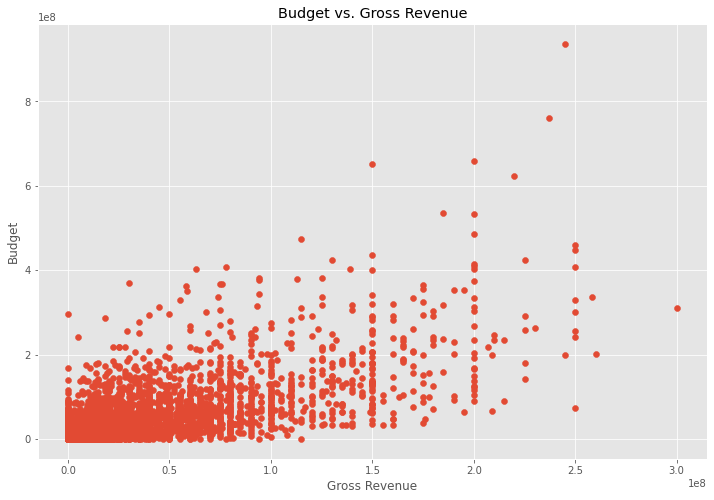

In [19]:
# Scatter plot with budget vs. gross revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs. Gross Revenue')

plt.xlabel('Gross Revenue')
plt.ylabel('Budget')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

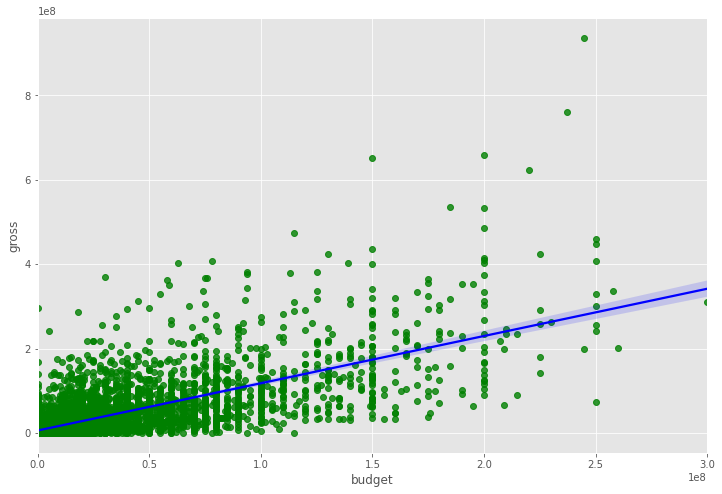

In [24]:
# Plot the budget vs. gross revenue using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "green"}, line_kws={"color":"blue"})

In [29]:
# Let's start looking at correlation
df.corr(method='pearson') # Three correlation methods: pearson (default), kendall, spearman

budget     gross   runtime     score     votes      year
budget   1.000000  0.712196  0.268226  0.042145  0.503924  0.291009
gross    0.712196  1.000000  0.224579  0.165693  0.662457  0.191548
runtime  0.268226  0.224579  1.000000  0.395343  0.317399  0.087639
score    0.042145  0.165693  0.395343  1.000000  0.393607  0.105276
votes    0.503924  0.662457  0.317399  0.393607  1.000000  0.229304
year     0.291009  0.191548  0.087639  0.105276  0.229304  1.000000

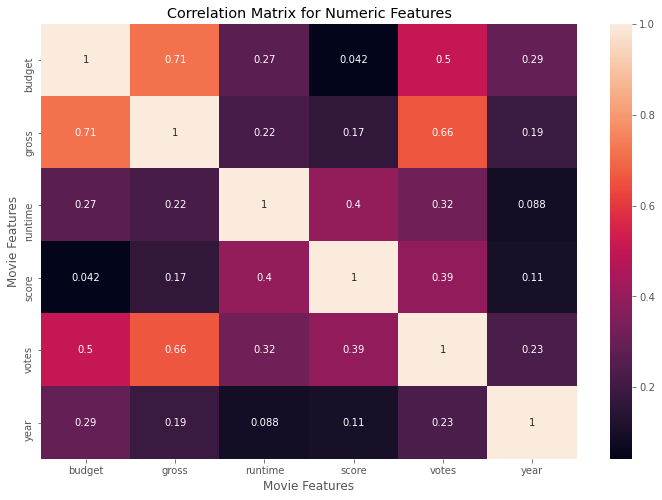

In [31]:
correlation_matrix=df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [42]:
# Look at Company
# Company is not numeric, so we have to create numeric identifiers for company names

df_numerized=df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes

df_numerized.head()



budget  company  country  director  genre      gross  name  rating  \
0   8000000      665       54      2192      1   52287414  4661       8   
1   6000000     1680       54      1296      4   70136369  1821       7   
2  15000000     1680       54      2645      0  179800601  6203       6   
3  18500000     2062       54      1066      0   85160248   295       8   
4   9000000     2122       54      2123      1   18564613  1872       6   

   released  runtime  score  star   votes  writer  year  yearcorrect  
0        39       89    8.1  2454  299174    3716  1986            0  
1        27      103    7.8  1605  264740    1970  1986            0  
2        23      110    6.9  2345  236909    1852  1986            0  
3        33      137    8.4  2192  540152    1629  1986            0  
4        36       90    6.9  1139   36636    2549  1986            0

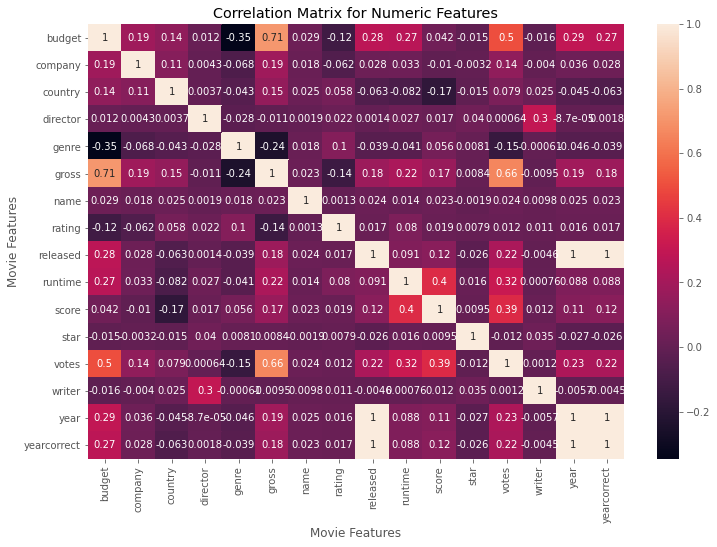

In [36]:
correlation_matrix=df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [38]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget       budget         1.000000
             company        0.187205
             country        0.137635
             director       0.011602
             genre         -0.346794
             gross          0.712196
             name           0.028712
             rating        -0.119660
             released       0.276635
             runtime        0.268226
             score          0.042145
             star          -0.015062
             votes          0.503924
             writer        -0.015611
             year           0.291009
             yearcorrect    0.274820
company      budget         0.187205
             company        1.000000
             country        0.107950
             director       0.004320
             genre         -0.068330
             gross          0.187220
             name           0.018098
             rating        -0.062250
             released       0.027898
             runtime        0.033058
             score         -0.010426
 

In [39]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.346794
budget       genre         -0.346794
gross        genre         -0.242676
genre        gross         -0.242676
score        country       -0.174414
country      score         -0.174414
votes        genre         -0.150519
genre        votes         -0.150519
rating       gross         -0.135538
gross        rating        -0.135538
budget       rating        -0.119660
rating       budget        -0.119660
country      runtime       -0.081796
runtime      country       -0.081796
genre        company       -0.068330
company      genre         -0.068330
country      yearcorrect   -0.062707
yearcorrect  country       -0.062707
country      released      -0.062609
released     country       -0.062609
rating       company       -0.062250
company      rating        -0.062250
year         genre         -0.046259
genre        year          -0.046259
country      year          -0.045204
year         country       -0.045204
genre        country       -0.042793
c

In [40]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        budget         0.503924
budget       votes          0.503924
votes        gross          0.662457
gross        votes          0.662457
             budget         0.712196
budget       gross          0.712196
released     year           0.996187
year         released       0.996187
yearcorrect  year           0.996229
year         yearcorrect    0.996229
yearcorrect  released       0.999389
released     yearcorrect    0.999389
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
y